In [148]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [149]:
# Loading Training dataset into dataframe
df= pd.read_csv('capstone_data/train.csv')

In [150]:
#DataFrame shape
df.shape

(1460, 81)

In [151]:
# First 5 rows in the DataFrame
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [152]:
# DataFrame Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

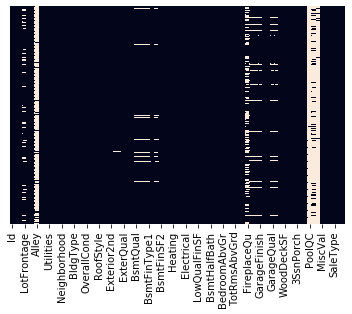

In [153]:
# Creating a heatmap plotting the NULL entries in the columns.
# The white bar represents the missing values.
_= sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [154]:
# Dropping the Alley, PoolQC, Fence and MiscFeature columns.
df.drop(['Alley'],axis=1,inplace=True)
df.drop(['Id'],axis=1,inplace=True)
df.drop(['PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)


In [155]:
# Replace NULL values with mean value for the column
df['LotFrontage']= df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea']= df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['BsmtFullBath']= df['BsmtFullBath'].fillna(df['BsmtFullBath'].mean()) 
df['HalfBath']= df['HalfBath'].fillna(df['HalfBath'].mean())

In [156]:
# Replace NULL values with mode value of the column
df['FireplaceQu']= df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['BsmtQual']= df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']= df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure']= df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']= df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']= df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['MasVnrType']= df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['GarageType']= df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt']= df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageFinish']= df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']= df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']= df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['Electrical']= df['Electrical'].fillna(df['Electrical'].mode()[0])


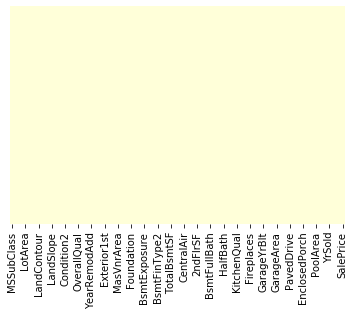

In [157]:
# Creating a heatmap plotting the NULL entries in the columns.
# The white bar represents the missing values.

_= sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [158]:
df.shape

(1460, 76)

In [159]:
# Finding the total NULL entries per feature/ column
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [160]:
df.dropna(inplace=True)

In [161]:
df.shape

(1460, 76)

In [162]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [163]:
# Extracting the categorical variable names into a list
cat_cols = df.select_dtypes(include=np.object).columns.tolist()
len(cat_cols)

39

In [164]:
print(cat_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [165]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [166]:
main_df= df.copy()

In [167]:
# Combine Test Data
test_df= pd.read_csv('processedtest1.csv')

In [168]:
test_df.shape

(1459, 75)

In [169]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [170]:
final_df= pd.concat([df, test_df], axis=0, sort=True)

In [171]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
1429         NaN
1430         NaN
1431         NaN
1432         NaN
1433         NaN
1434         NaN
1435         NaN
1436         NaN
1437         NaN
1438         NaN
1439         NaN
1440         NaN
1441         NaN
1442         NaN
1443         NaN
1444         NaN
1445         NaN
1446         NaN
1447         NaN
1448         NaN
1449         NaN
1450         NaN
1451         NaN
1452         NaN
1453         NaN
1454         NaN
1455         NaN
1456         N

In [172]:
final_df.shape

(2919, 76)

In [173]:
final_df=category_onehot_multcols(cat_cols)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [174]:
final_df.shape

(2919, 237)

In [175]:
final_df= final_df.loc[:, ~final_df.columns.duplicated()]

In [176]:
final_df.shape

(2919, 177)

In [186]:
final_df= final_df.dropna()

In [187]:
final_df.isnull().values.any()

False

In [188]:
#Dividing the data into Training and testing data
X= final_df.drop(['SalePrice'], axis=1)
y= final_df.SalePrice

In [189]:
# Splitting the dataset into Training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [190]:
#Using Linear Regressor
reg_all= LinearRegression()

#Fitting the regressor to the training data
reg_all.fit(X_train, y_train)

#Predict on the test data
y_pred= reg_all.predict(X_test)

In [193]:
# Computing R^2
print("R^2: {}".format(reg_all.score(X_test, y_test)))

R^2: -2674697655.584721


In [194]:
# Computing RMSE (Root Mean Square Error)
rmse= np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 4320218863.647167


In [195]:
#Testing cross validation
cv_results= cross_val_score(reg_all, X, y, cv=5)

In [196]:
print(cv_results)

[-4.90440242e+08 -1.02625496e+07 -2.12850995e+07 -2.15232416e+07
 -5.02383346e+08]


In [197]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))

Average 5-Fold CV Score: -209178895.7546815
